**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo (A)

---


Aluna(o): Eduardo Barros Pimenta - Gerente

---

Aluna(o): Thiago Emanuell Vieira Moura - Engenheiro de Conhecimento

---

Aluna(o): Wendel Marques de Jesus Souza - Analista de Dados

---

# Objetivos deste artefato

O objetivo geral é a obtenção de *insights* sobre o conjunto de dados.  Para tanto, serão utilizadas técnicas de visualização de dados e alguns cálculos estátisticos básicos. Essa etapa é chamada de análise exploratória de dados (AED). Por meio dela, é possível também encontrar problemas, padrões e relacionamentos que poderão apoiar a etapa de pré-processamento, que antecede a implementação. 

# Descrição geral da base de dados

### O conjunto de dados

É um conjunto de dados sintético gerado usando o simulador chamado PaySim. PaySim usa dados agregados do conjunto de dados privado para gerar um conjunto de dados sintético que se assemelha à operação normal de transações e injeta comportamento malicioso para avaliar posteriormente o desempenho dos métodos de detecção de fraude.

Os logs originais foram fornecidos por uma empresa multinacional, fornecedora do serviço financeiro móvel que atualmente opera em mais de 14 países em todo o mundo. O conjunto de dados sintético é reduzido em 1/4 do conjunto de dados original

Tradução livre da descrição disponível em [conjunto de dados financeiros sintéticos para detecção de fraude
](https://www.kaggle.com/ntnu-testimon/paysim1).

### Headers

Este é um exemplo de 1 linha com explicação de cabeçalhos:


**1,	CASH_OUT,	181.00,	C840083671,	181.0,	0.00,	C38997010,	21182.0,	0.0,	1,	0**

Cada campo corresponde a respectivamente:

*  **step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 etapa corresponde a 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

* **tipo** - CASH-IN, CASH-OUT, DEBIT, PAYMENT ou TRANSFER.

* **montante** - montante da transação em moeda local.

* **nameOrig** - cliente que iniciou a transação

* **oldbalanceOrg** - saldo inicial antes da transação

* **newbalanceOrig** - novo saldo após a transação

* **nameDest** - cliente que é o destinatário da transação

* **oldbalanceDest** - destinatário do saldo inicial antes da transação. Observe que não há informações para clientes que começam com M (Comerciantes).
newbalanceDest - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

* **isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e retirando do sistema.

* **isFlaggedFraud** - O modelo de negócios visa controlar as transferências em massa de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Passos preliminares

###Bibliotecas utilizadas

In [ ]:
#biblitoecas utilizadas na etada AED
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') #evita que warnings sejam mostrados
from sklearn.preprocessing import LabelEncoder

### Leitura dos dados

In [ ]:
#Leitura dos dados
df = pd.read_csv('/content/drive/MyDrive/2020.2/Inteligência Artificial (IA)/Trabalhos/00. Árvores de Decisão/BaseDeDados/PS_20174392719_1491204439457_log.csv')

# Análise exploratória dos dados

### Informações básicas sobre o DataFrame
Dimensionalidade e descrição estatística

In [ ]:
#Verificação de algumas linhas 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Verificação da dimensionalidade do DataFrame
df.shape

(6362620, 11)

In [ ]:
#Informações dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Descrição estatística de cada recurso
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Há tipos *int, float e object.*

Possui 6.362.620 linhas (transações) e 11 colunas (atributos).

### Valores faltantes e linhas duplicadas

In [ ]:
#Verificação de valores missing
for coluna in df.columns:
    print("Qtd. de valores faltantes em {}: {}".format(coluna, df[coluna].isna().sum()))

Qtd. de valores faltantes em step: 0
Qtd. de valores faltantes em type: 0
Qtd. de valores faltantes em amount: 0
Qtd. de valores faltantes em nameOrig: 0
Qtd. de valores faltantes em oldbalanceOrg: 0
Qtd. de valores faltantes em newbalanceOrig: 0
Qtd. de valores faltantes em nameDest: 0
Qtd. de valores faltantes em oldbalanceDest: 0
Qtd. de valores faltantes em newbalanceDest: 0
Qtd. de valores faltantes em isFraud: 0
Qtd. de valores faltantes em isFlaggedFraud: 0


In [ ]:
#Eliminação de valores missing (caso seja necessário)
df.dropna(inplace=True)

In [ ]:
#Eliminação de duplicates
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
#Remoção de duplicates, se necessário
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.shape()

(6362620, 11)

Como base nos resultados, é possível afirmar que a base de dados não possui valores faltantes ou linhas duplicadas. 

### Análise dos atributos

O processo de análise foi guiado por 4 principais questões. São elas:
* O conjunto de dados é balanceado?
* Qual é a taxa de fraude por hora do dia?
* Em quais operações ocorrem fraudes?
* Qual é a correlação entre cada atributo?

#### isFraud e isFlaggedFraud
**O conjunto de dados é balanceado?**

Após a análise do contexto do problema e da origem do conjunto de dados, vamos considerar que:
* isFraud indica as transações reais de fraude;
* isFlaggedFraud indica transações que foram sinalizadas pelo fato de utrapassarem certo limite estabelecido (tentativa de transferir mais de 200.000 em uma única transação).

In [ ]:
#Compração da quantidades de fraudes (ou possível tentativa de fraude) com a quantidade total de transações
print('isFraud:')
print(df.isFraud.value_counts())

print('\n\nisFlaggedFraud:')
print(df.isFlaggedFraud.value_counts())

isFraud:
0    6354407
1       8213
Name: isFraud, dtype: int64


isFlaggedFraud:
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64



Vamos verificar essas questões nos gráficos.

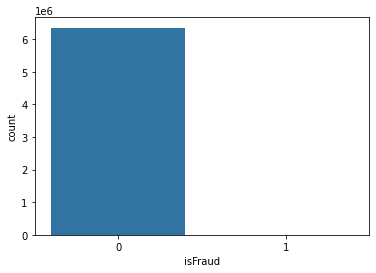

In [ ]:
#Análise visual da váriavel 'isFraud'
sns.countplot(df['isFraud'])

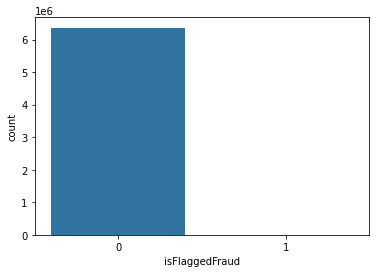

In [ ]:
#Análise visual da váriavel 'isFlaggedFraud'
sns.countplot(df['isFlaggedFraud'])

In [ ]:
#Cálculo da representatividade das transações fraudulentas
porcentagem_fraudes = (df.isFraud.value_counts()[1]*100/df.isFraud.value_counts()[0])
porcentagem_fraudes

0.129248881917699

O número total de transações é 6.362.620, das quais 8.213 são fraudes e 6.354.407 não são transações fraudulentas. Isso significa, como cálculado anteriormente, que aproximadamente 0,13% são transações fraudulentas.  

Além disso, o indicador *isFlaggedFraud* sinalizou apenas 16 transações do total de 6.362.620. 

Esse resutlados mostram que este é um conjunto de dados desequilibrado.


#### Step vs. Taxa de fraude
**Qual a taxa de fraude por hora do dia?**

**Step** mapeia uma unidade de tempo no mundo real. Assim, 1 *step* corresponde a 1 hora de tempo. Total de etapas 744 (simulação de 30 dias). Nesse sentido, podemos tentar encontrar um padrão no que diz respeito à tempestividade das tentativas de fraude.

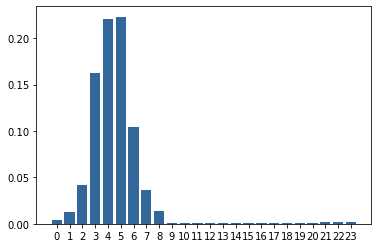

In [ ]:
#transforma step (1 a 744) em horas do dia (0 a 24)
tmp = pd.DataFrame()
tmp = df.copy()
tmp['hora_do_dia'] = tmp.step%24

#calcula a quantidade de transacoes por hora
contagem_transacoes_por_hora = tmp.groupby('hora_do_dia')['isFraud'].count()
#calcula a qtd de fraudes por hora
soma_fraudes_por_hora = tmp.groupby('hora_do_dia')['isFraud'].sum()

fraudes_por_hora = pd.concat([soma_fraudes_por_hora, contagem_transacoes_por_hora],axis=1)
fraudes_por_hora.columns = ['fraudes','transacoes']
fraudes_por_hora['taxa_de_fraude'] = fraudes_por_hora.fraudes/fraudes_por_hora.transacoes

# Create bars
bars = fraudes_por_hora.index
x_pos = np.arange(len(bars))
height = fraudes_por_hora.taxa_de_fraude

# Create names on the x-axis
plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 1))
plt.xticks(x_pos, bars)
# tmp.drop(columns=['hora_do_dia'],inplace=True)
plt.show()


O gráfico anterior mostra que as maiores taxas de fraude estão entre 3 horas da manhã e 5 horas da manhã. 

**Este resultado significa que há uma quantidade maior de fraudes nesse período do dia? Vamos verificar!**

In [ ]:
#quantidade de transações totais entre 3am e 5am
contagem_transacoes_por_hora[3:6]

hora_do_dia
3    2007
4    1241
5    1641
Name: isFraud, dtype: int64

In [ ]:
#quantidade de transações entre 13h e 15h 
contagem_transacoes_por_hora[13:15]

hora_do_dia
13    468474
14    439653
Name: isFraud, dtype: int64

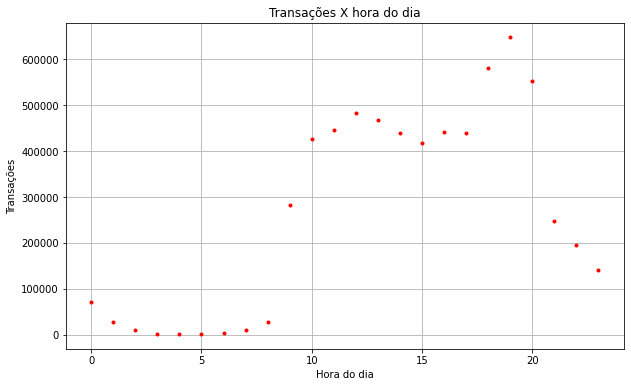

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotagem para verificar se existem uma tendência entre transações vs. hora do dia 
figsize=(10,6)
plt.subplots(figsize=figsize)
plt.plot(range(len(fraudes_por_hora)), 
         fraudes_por_hora.transacoes,
         'r.'
         )
plt.xlabel('Hora do dia')
plt.ylabel('Transações')
plt.title('Transações X hora do dia')
plt.grid(True)
plt.show()
plt.tight_layout()

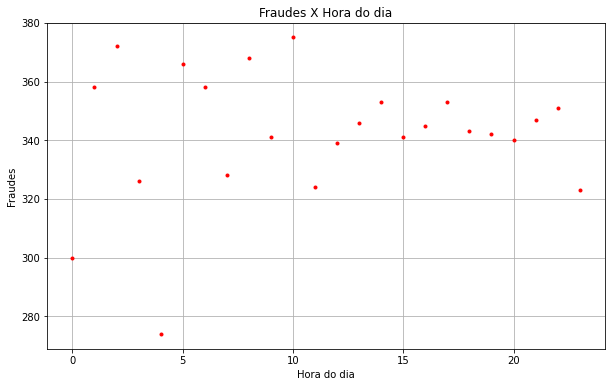

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotagem para verificar se existem uma tendência entre hora do dia vs. qtd. de fraudes
figsize=(10,6)
plt.subplots(figsize=figsize)
plt.plot(range(len(fraudes_por_hora)), 
         fraudes_por_hora.fraudes,
         'r.'
         )
plt.xlabel('Hora do dia')
plt.ylabel('Fraudes')
plt.title('Fraudes X Hora do dia')
plt.grid(True)
plt.show()
plt.tight_layout()

In [ ]:
#Média da quantidade de fraudes realizadas 
print(round(fraudes_por_hora['fraudes'].mean(), 0))

342.0


Como podemos observar, a quantidade de fraudes é, em média, 342. Este resultado, em consonância com os gráficos anteriores, mostra que as maiores taxas de fraude estão entre 3 horas da manhã e 5 horas da manhã porque a quantidade de transações nesse período é significativamente menor.

#### Tipos de transações
**Em quais operações ocorrem fraudes?**

Como ilustrado abaixo, existem 5 tipos de transações.

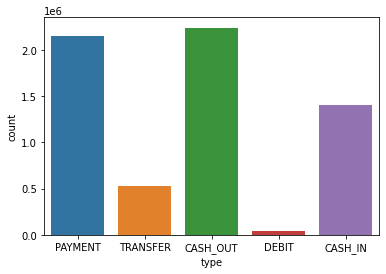

In [ ]:
# Verificação das características das categorias 'type'
df.type.value_counts()
sns.countplot(df.type)

Em quais tipos de transação acontecem fraudes? 

In [ ]:
#Groupby type
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


Vamos verificar visual o resultado da tabela anterior.

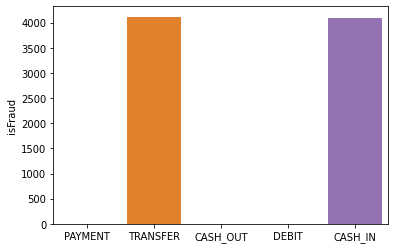

In [ ]:
sns.barplot(x=df.type.unique(),y=df.groupby("type")["isFraud"].sum())

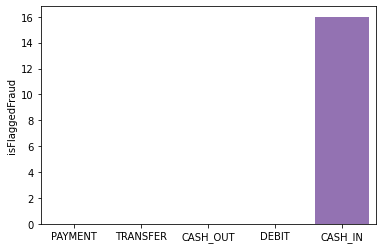

In [ ]:
sns.barplot(x=df.type.unique(),y=df.groupby("type")["isFlaggedFraud"].sum())

Dos cincos possíveis tipos de transações, fraudes ocorrem apenas em 2 tipos de transações: ***transfer*** e ***cash_out*** (em *isFraud*). 

O indicador *isFlaggedFraud* sinalizou fraudes em apenas um tipo de operação, a saber, ***transfer***.

### Análise de correlação
**Qual é a correlação entre cada atributo?** 

In [ ]:
#Explorando as correlações com isFraud
df.corr()['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [ ]:
#Explorando as correlações com isFlaggedFraud
df.corr()['isFlaggedFraud'].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
Name: isFlaggedFraud, dtype: float64

In [ ]:
# df.corr(method='spearman')

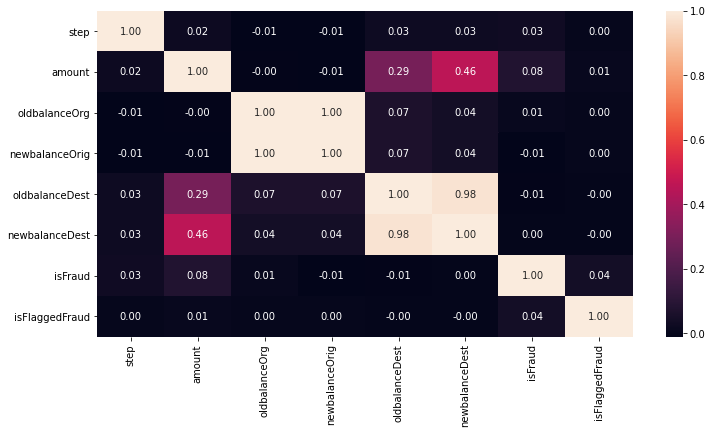

In [ ]:
#Mapa de calor das features
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Quanto maior o valor da correlação entre cada variável, o gráfico fica  mais claro.

# Problemas encontrados

#### isFlaggedFraud não é acionada

In [ ]:
#Verificação de: "O modelo de negócios visa controlar as transferências em massa de uma conta para outra e sinaliza tentativas ilegais. 
                  #Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação."
                  
df_filtered = df[(df.type == 'TRANSFER') & (df.amount >= 200000)]
len(df_filtered)

409110

Por definição, quando há uma tentativa de transferir (operação *transfer*) um valor igual ou superior a 200 mil em apenas uma transação, *isFlaggedFraud* é acionada. Entretanto, como mostar o resultado anterior, isso não acontece em um total de 409.110 transações.


Caso seja esse um dos atributos selecionados para treinar o modelo, uma possível solução seria alterar *isFlaggedFraud* de acordo com o limite estabelecido. Porém, pode não ser uma prática correta. O ideal seria verificar as razões pelas quais a origem dos dados- nesse caso, o simulador, não acionou a *flag*.

#### Conjunto de dados desbalanceado

Como visto na etapa *Análise dos atributos*, do número total de transações (6.362.620) apenas 0,13% são transações frauldulentas.

Uma solução será apresentada na etapa de pré-processamento.